<a href="https://colab.research.google.com/github/makropolecenia/Book/blob/master/SCRAPER_OWID_MAIL_28_06_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCRAPER ZRÓDŁA OWID (OURWORLDINDATA.ORG) -9 WSKAZNIKOW W PLIKU ZBIORCZYM CSV

STAN NA 26.06.2021

UWAGI - DO ROZWIAZANIA:

W PLIKU CSV ZNAJDUJE SIĘ CAŁA HISTORIA, DO BAZY WPROWADZIMY TYLKO NAJBARDZIEJ AKTUALNE (NOWE REKORDY) WYMAGA TO SPRAWDZENIA MAXDATY REKORDÓW JUZ ZAPISANYCH W BAZIE

CZY PLIK CSV JEST AKTUALIZOWANY WSTECZNIE?

33102000000, 33103000000


WSKAZNIKI : 

21001000000	Przypadki Covid-19 dziennie

21002000000	Przypadki Covid-19 przyrostowo

21005000000	Liczba przypadków Covid-19 na milion obywateli

21005010000	Liczba przypadków Covid-19 śmiertelnych na milion obywateli

22001000000	Całkowita liczba testów

23002000000	Populacja kraju

33102000000	łączna liczba podanych dawek szczepionki

33103000000	Nowe szczepienia

33104000000	Całkowita liczba podanych dawek 
szczepionki na 100 obywateli


MAPOWANIE DOSTEPNYCH DANYCH NA WSKAZNIKI W BAZIE BDM_COVID_EDIT

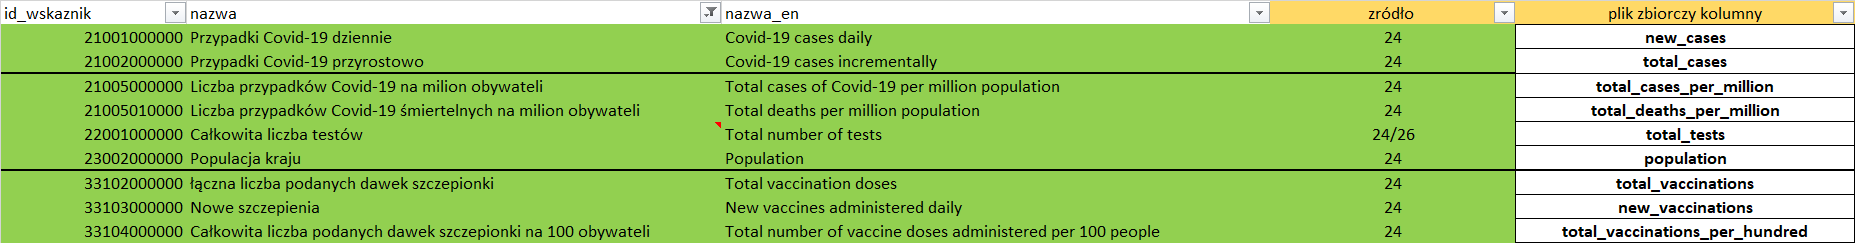

GITHUB - ADRESY URL DO PLIKÓW CSV

In [ ]:
#https://github.com/owid/covid-19-data
#https://github.com/owid/covid-19-data/blob/master/public/data/README.md
#https://covid.ourworldindata.org/data/owid-covid-data.csv

SCRAPER Z PLIKU ZBIORCZEGO - owid-covid-data.csv

In [ ]:
#DANE AKTUALIZOWANE - ZBIORCZE - PLIK owid-covid-data.csv


import pandas as pd

data_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

data = pd.read_csv(data_url)

print(data.head())

data

  iso_code continent  ... human_development_index excess_mortality
0      AFG      Asia  ...                   0.511              NaN
1      AFG      Asia  ...                   0.511              NaN
2      AFG      Asia  ...                   0.511              NaN
3      AFG      Asia  ...                   0.511              NaN
4      AFG      Asia  ...                   0.511              NaN

[5 rows x 60 columns]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98633,ZWE,Africa,Zimbabwe,2021-06-23,43480.0,766.0,417.714,1692.0,1.0,7.429,2925.400,51.538,28.104,113.840,0.067,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5716.0,614408.0,41.338,0.385,3785.0,0.255,0.110,9.1,tests performed,1166849.0,715056.0,451793.0,20471.0,6568.0,7.85,4.81,3.04,442.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98634,ZWE,Africa,Zimbabwe,2021-06-24,44306.0,826.0,482.714,1709.0,17.0,8.857,2980.974,55.575,32.478,114.984,1.144,0.596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.0,619296.0,41.667,0.329,3978.0,0.268,0.121,8.2,tests performed,1193315.0,725582.0,467733.0,26466.0,9604.0,8.03,4.88,3.15,646.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98635,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

In [ ]:
#ograniczenie listy, wyfiltrowanie listy potrzebnych krajów

data2 = data[data['iso_code'].isin(['POL','AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','GRC','ESP','NLD','IRL','LTU','LUX','LVA','DEU','PRT','ROU','SVK','SVN','SWE','HUN','GBR','ITA'])]

#data2.to_excel('SCRAPER_OWID1_SPRAWDZENIE_WARTOSCI_NA_WEJSCIU.xlsx')

data2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5685,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,0.222,0.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922,NaN
5686,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,0.222,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922,NaN
5687,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,NaN,0.333,0.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922,NaN
5688,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,NaN,0.333,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922,NaN
5689,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,NaN,0.999,0.666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93476,GBR,Europe,United Kingdom,2021-06-23,4683986.0,15943.0,11168.714,128291.0,19.0,14.429,68997.816,234.850,164.522,1889.800,0.280,0.213,NaN,246.0,3.624,1486.0,21.89,NaN,NaN,NaN,NaN,1150834.0,201822459.0,2972.961,16.952,1011931.0,14.906,0.011,90.6,tests performed,75564430.0,43656327.0,31908103.0,375635.0,381796.0,111.31,64.31,47.00,5624.0,51.39,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93477,GBR,Europe,United Kingdom,2021-06-24,4700691.0,16705.0,12009.000,128312.0,21.0,14.714,69243.890,246.074,176.899,1890.110,0.309,0.217,NaN,259.0,3.815,1505.0,22.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75963777.0,43877861.0,32085916.0,399347.0,372097.0,111.90,64.63,47.26,5481.0,51.39,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93478,GBR,Europe,United Kingdom,2021-06-25,4716065.0,15374.0,12735.714,128330.0,18.0,15.714,69470.358,226.468,187.604,1890.375,0.265,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76341044.0,4

In [ ]:
#pobranie odpowiednich kolumn do dalszego przetwarzania 

data3 = data2[['date','iso_code','total_cases','new_cases','total_cases_per_million','total_deaths_per_million','total_vaccinations','new_vaccinations','total_vaccinations_per_hundred','population','total_tests','total_tests_per_thousand']]

data3

,date,iso_code,total_cases,new_cases,total_cases_per_million,total_deaths_per_million,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,population,total_tests,total_tests_per_thousand
5685,2020-02-25,AUT,2.0,2.0,0.222,NaN,NaN,NaN,NaN,9006400.0,NaN,NaN
5686,2020-02-26,AUT,2.0,0.0,0.222,NaN,NaN,NaN,NaN,9006400.0,NaN,NaN
5687,2020-02-27,AUT,3.0,1.0,0.333,NaN,NaN,NaN,NaN,9006400.0,NaN,NaN
5688,2020-02-28,AUT,3.0,0.0,0.333,NaN,NaN,NaN,NaN,9006400.0,NaN,NaN
5689,2020-02-29,AUT,9.0,6.0,0.999,NaN,NaN,NaN,NaN,9006400.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
93476,2021-06-23,GBR,4683986.0,15943.0,68997.816,1889.800,75564430.0,375635.0,111.31,67886004.0,201822459.0,2972.961
93477,2021-06-24,GBR,4700691.0,16705.0,69243.890,1890.110,75963777.0,399347.0,111.90,67886004.0,NaN,NaN
93478,2021-06-25,GBR,4716065.0,15374.0,69470.358,1890.375,76341044.0,377267.0,112.45,67886004.0,NaN,NaN
93479,2021-06-26,GBR,4734011.0,17946.0,69734.713,1890.714,76774990.0,433946.0,113.09,67886004.0,NaN,NaN


In [ ]:
#unpivot dataframu na wielu wskaznikach

df_unpivoted = data3.melt(id_vars=['date','iso_code' ], var_name='var_name', value_name='value_name')

#df_unpivoted.to_excel('SCRAPER_OWID_SPRAWDZENIE_NA_W_ETYKIETACH.xlsx')

df_unpivoted

,date,iso_code,var_name,value_name
0,2020-02-25,AUT,total_cases,2.000
1,2020-02-26,AUT,total_cases,2.000
2,2020-02-27,AUT,total_cases,3.000
3,2020-02-28,AUT,total_cases,3.000
4,2020-02-29,AUT,total_cases,9.000
...,...,...,...,...
134265,2021-06-23,GBR,total_tests_per_thousand,2972.961
134266,2021-06-24,GBR,total_tests_per_thousand,NaN
134267,2021-06-25,GBR,total_tests_per_thousand,NaN
134268,2021-06-26,GBR,total_tests_per_thousand,NaN


In [ ]:

#WPROWADZENIE SŁOWNIKÓW


#etykieta : wskaznik

dict2 ={


        'new_cases':'21001000000', 

        'total_cases':'21002000000',



        'total_cases_per_million':'21005000000', 

        'total_deaths_per_million':'21005010000', 

        'total_tests':' 22001000000', 

        'population':'23002000000',

        'total_vaccinations':'33102000000',

        'new_vaccinations':'33103000000',

        'total_vaccinations_per_hundred':'33104000000'}


print (len (dict2))

9


In [ ]:
#WPROWADZENIE SŁOWNIKÓW

#słownik symbol kraju : id_teryt


dict3 ={

            #'0':'0',
            #'EU28':'1',
            #'EU27_2020':'2',
        
            'POL':'3',
            'AUT':'4',
            'BEL':'5',
            'BGR':'6',
            'HRV':'7',
            'CYP':'8',
            'CZE':'9',
            'DNK':'10',
            'EST':'11',
            'FIN':'12',
            'FRA':'13',
            'GRC':'14',
            'ESP':'15',
            'NLD':'16',
            'IRL':'17',
            'LTU':'18',
            'LUX':'19',
            'LVA':'20',
            #'MT':'21',
            'DEU':'22',
            'PRT':'23',
            'ROU':'24',
            'SVK':'25',
            'SVN':'26',
            'SWE':'27',
            'HUN':'28',
            'GBR':'29',
            'ITA':'30'}

print (len (dict3))

27


In [ ]:


#mapowanie kolumny z symbolami krajów na id_teryt



dict3 ={

            #'0':'0',
            #'EU28':'1',
            #'EU27_2020':'2',
        
            'POL':'3',
            'AUT':'4',
            'BEL':'5',
            'BGR':'6',
            'HRV':'7',
            'CYP':'8',
            'CZE':'9',
            'DNK':'10',
            'EST':'11',
            'FIN':'12',
            'FRA':'13',
            'GRC':'14',
            'ESP':'15',
            'NLD':'16',
            'IRL':'17',
            'LTU':'18',
            'LUX':'19',
            'LVA':'20',
            #'MT':'21',
            'DEU':'22',
            'PRT':'23',
            'ROU':'24',
            'SVK':'25',
            'SVN':'26',
            'SWE':'27',
            'HUN':'28',
            'GBR':'29',
            'ITA':'30'}

print (len (dict3))

df_unpivoted['iso_code']=df_unpivoted['iso_code'].map(dict3)

df_unpivoted

27


,date,iso_code,var_name,value_name
0,2020-02-25,4,total_cases,2.000
1,2020-02-26,4,total_cases,2.000
2,2020-02-27,4,total_cases,3.000
3,2020-02-28,4,total_cases,3.000
4,2020-02-29,4,total_cases,9.000
...,...,...,...,...
134265,2021-06-23,29,total_tests_per_thousand,2972.961
134266,2021-06-24,29,total_tests_per_thousand,NaN
134267,2021-06-25,29,total_tests_per_thousand,NaN
134268,2021-06-26,29,total_tests_per_thousand,NaN


In [ ]:
#mapowanie kolumny etykiety wskaznika na id_wskaznika

dict2 ={

        'new_cases':'21001000000', 

        'total_cases':'21002000000',

        'total_cases_per_million':'21005000000', 

        'total_deaths_per_million':'21005010000', 

        'total_tests':'22001000000', 

        'population':'23002000000',

        'total_vaccinations':'33102000000',

        'new_vaccinations':'33103000000',

        'total_vaccinations_per_hundred':'33104000000'}


df_unpivoted['var_name']=df_unpivoted['var_name'].map(dict2)

df_unpivoted

,date,iso_code,var_name,value_name
0,2020-02-25,4,21002000000,2.000
1,2020-02-26,4,21002000000,2.000
2,2020-02-27,4,21002000000,3.000
3,2020-02-28,4,21002000000,3.000
4,2020-02-29,4,21002000000,9.000
...,...,...,...,...
134265,2021-06-23,29,NaN,2972.961
134266,2021-06-24,29,NaN,NaN
134267,2021-06-25,29,NaN,NaN
134268,2021-06-26,29,NaN,NaN


In [ ]:
#formatowanie daty

#df.dtypes

df_unpivoted.dtypes

df_unpivoted['date'] = pd.to_datetime(
                          df_unpivoted['date'],
                          format='%Y-%m-%d')

df_unpivoted

,date,iso_code,var_name,value_name
0,2020-02-25,4,21002000000,2.000
1,2020-02-26,4,21002000000,2.000
2,2020-02-27,4,21002000000,3.000
3,2020-02-28,4,21002000000,3.000
4,2020-02-29,4,21002000000,9.000
...,...,...,...,...
134265,2021-06-23,29,NaN,2972.961
134266,2021-06-24,29,NaN,NaN
134267,2021-06-25,29,NaN,NaN
134268,2021-06-26,29,NaN,NaN


In [ ]:
# sprawdzenie formatu danych kolumn

df_unpivoted.dtypes

date          datetime64[ns]
iso_code              object
var_name              object
value_name           float64
dtype: object

In [ ]:
#uporzadkowanie kolejnosci kolumn do dalszego przetwarzania 

data=df_unpivoted[['value_name','date','var_name','iso_code']]

#data.to_excel('SCRAPER_OWID_SPRAWDZENIE_PRZED_USUNIECIEM_NA.xlsx')

data

,value_name,date,var_name,iso_code
0,2.000,2020-02-25,21002000000,4
1,2.000,2020-02-26,21002000000,4
2,3.000,2020-02-27,21002000000,4
3,3.000,2020-02-28,21002000000,4
4,9.000,2020-02-29,21002000000,4
...,...,...,...,...
134265,2972.961,2021-06-23,NaN,29
134266,NaN,2021-06-24,NaN,29
134267,NaN,2021-06-25,NaN,29
134268,NaN,2021-06-26,NaN,29


In [ ]:
# usuniecie wierszy z wartoscią NAN gdziekolwiek jest (brak danych)


data = data.dropna()

data

,value_name,date,var_name,iso_code
0,2.0,2020-02-25,21002000000,4
1,2.0,2020-02-26,21002000000,4
2,3.0,2020-02-27,21002000000,4
3,3.0,2020-02-28,21002000000,4
4,9.0,2020-02-29,21002000000,4
...,...,...,...,...
120834,197392365.0,2021-06-19,22001000000,29
120835,198576291.0,2021-06-20,22001000000,29
120836,199731875.0,2021-06-21,22001000000,29
120837,200621518.0,2021-06-22,22001000000,29


In [ ]:
#UTWORZENIE PEŁNEGO REKORDU DO BAZY

pd.options.mode.chained_assignment = None 


data.rename(columns = {'value_name':'wartosc'}, inplace = True) 
data.rename(columns = {'date':'data1'}, inplace = True) 
data.rename(columns = {'var_name':'id_wskaznik1'}, inplace = True) 

data.rename(columns = {'iso_code':'id_teryt'}, inplace = True) 


decimals=4

data['wartosc'] = data['wartosc'].apply(lambda x: round(x, decimals)) #zaokraglenie 4 miejsca po przecinku 

print ('data')
print(data)

data['data_wprowadzenia'] = pd .datetime .now ().replace (hour =0 ,minute =0 ,second =0 ,microsecond =0 )
data['data_modyfikacji'] = pd .datetime .now ().replace (hour =0 ,minute =0 ,second =0 ,microsecond =0 )

data ['id_komentarz'] ='1'
data ['id_wprowadzajacego'] ='11'
data ['id_modyfikujacego'] ='11'

data ['data'] = data ['data1'] 
data ['id_zrodlo'] ='24' # DLA OWID ZAWSZE 24

data ['id_wskaznik'] = data ['id_wskaznik1']

print ('data')
print(data)

data2 = data[['wartosc','data_wprowadzenia','data_modyfikacji','id_komentarz','id_wprowadzajacego','id_modyfikujacego','id_teryt','data','id_zrodlo','id_wskaznik']]

print ('data2')
print(data2)


data3 = data2[data2["data"].isin(pd.date_range('1990-01-01', '2021-12-31'))] # wyfiltrowane rekordy dla zakresu dat, można zmienic np dla ostatnich kilku dni   

data3.to_excel('SCRAPER_OWID_OUTPUT.xlsx')

print ('data3 - output')
print(data3)

print (" zakonczenie programu ")

data3

data
            wartosc      data1 id_wskaznik1 id_teryt
0               2.0 2020-02-25  21002000000        4
1               2.0 2020-02-26  21002000000        4
2               3.0 2020-02-27  21002000000        4
3               3.0 2020-02-28  21002000000        4
4               9.0 2020-02-29  21002000000        4
...             ...        ...          ...      ...
120834  197392365.0 2021-06-19  22001000000       29
120835  198576291.0 2021-06-20  22001000000       29
120836  199731875.0 2021-06-21  22001000000       29
120837  200621518.0 2021-06-22  22001000000       29
120838  201822459.0 2021-06-23  22001000000       29

[87656 rows x 4 columns]
data
            wartosc      data1 id_wskaznik1  ...       data id_zrodlo  id_wskaznik
0               2.0 2020-02-25  21002000000  ... 2020-02-25        24  21002000000
1               2.0 2020-02-26  21002000000  ... 2020-02-26        24  21002000000
2               3.0 2020-02-27  21002000000  ... 2020-02-27        24  21002000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


data3 - output
            wartosc data_wprowadzenia  ... id_zrodlo  id_wskaznik
0               2.0        2021-06-28  ...        24  21002000000
1               2.0        2021-06-28  ...        24  21002000000
2               3.0        2021-06-28  ...        24  21002000000
3               3.0        2021-06-28  ...        24  21002000000
4               9.0        2021-06-28  ...        24  21002000000
...             ...               ...  ...       ...          ...
120834  197392365.0        2021-06-28  ...        24  22001000000
120835  198576291.0        2021-06-28  ...        24  22001000000
120836  199731875.0        2021-06-28  ...        24  22001000000
120837  200621518.0        2021-06-28  ...        24  22001000000
120838  201822459.0        2021-06-28  ...        24  22001000000

[87656 rows x 10 columns]
 zakonczenie programu 


,wartosc,data_wprowadzenia,data_modyfikacji,id_komentarz,id_wprowadzajacego,id_modyfikujacego,id_teryt,data,id_zrodlo,id_wskaznik
0,2.0,2021-06-28,2021-06-28,1,11,11,4,2020-02-25,24,21002000000
1,2.0,2021-06-28,2021-06-28,1,11,11,4,2020-02-26,24,21002000000
2,3.0,2021-06-28,2021-06-28,1,11,11,4,2020-02-27,24,21002000000
3,3.0,2021-06-28,2021-06-28,1,11,11,4,2020-02-28,24,21002000000
4,9.0,2021-06-28,2021-06-28,1,11,11,4,2020-02-29,24,21002000000
...,...,...,...,...,...,...,...,...,...,...
120834,197392365.0,2021-06-28,2021-06-28,1,11,11,29,2021-06-19,24,22001000000
120835,198576291.0,2021-06-28,2021-06-28,1,11,11,29,2021-06-20,24,22001000000
120836,199731875.0,2021-06-28,2021-06-28,1,11,11,29,2021-06-21,24,22001000000
120837,200621518.0,2021-06-28,2021-06-28,1,11,11,29,2021-06-22,24,22001000000
